In [1]:
import pickle

In [2]:
#thisPickle = pickle.load(open('flaskexample/static/yarninfo/rohrspatz--wollmeise-sockenwolle-80-20-twin_500.pkl', 'rb'))

In [3]:
infile = open('yarntimeseries.pkl','rb')
new_dict = pickle.load(infile)
infile.close()

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [5]:
from tqdm import tqdm

In [6]:
yData ={}
decomp = {}
#print(new_dict)
try:
    del new_dict['caron-simply-soft-tweeds-2']
except KeyError:
    print("Key 'testing' not found")
try:
    del new_dict['red-heart-super-saver-solids']
except KeyError:
    print("Key 'testing' not found")
try:
    del new_dict['malabrigo-yarn-rios']
except KeyError:
    print("Key 'testing' not found")

for yname in tqdm(new_dict):
    print(f'working on dictionary {yname}')
    df1 =pd.DataFrame(new_dict[yname][1:-1])
    df2 = df1.reset_index()
    df2 = df2.rename(columns={'index':'Date'})
    df2 = df2[df2.Date != 'In progress']
    df2 = df2[df2.Date != 'Hibernating']
    df2 = df2[df2.Date != 'Frogged']
    df2 = df2[df2.Date != 'Finished']
    df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True, errors='coerce')

    df2= df2.set_index('Date')#,inplace=True)
    #df2.index.freq = '-1MS'
    df2=df2.sort_index()
    cleandf2 = df2.dropna()
    try:
        slicedf2 = cleandf2
        result = seasonal_decompose(slicedf2['Project Count'], model='add')
    except:
        slicedf2 = cleandf2['2017-01-01':'2019-08-01']
        result = seasonal_decompose(slicedf2['Project Count'], model='add')
    #print(df2['Project Count'],'\n')
    #slicedf2.index.freq = 'MS'
    #freqdf2 = slicedf2.asfreq('-1MS').index
    
    decomp[yname]= result
    yData[yname]=slicedf2
    #dict_name[yname] = {'key1' = result, 'key2' = slicedf2}
    
    

  2%|▏         | 4/178 [00:00<00:04, 39.58it/s]

working on dictionary rohrspatz--wollmeise-sockenwolle-80-20-twin
working on dictionary blue-moon-fiber-arts-socks-that-rock-lightweight
working on dictionary cascade-yarns-heritage-paints
working on dictionary cascade-yarns-heritage
working on dictionary lion-brand-pound-of-love
working on dictionary knit-picks-brava-worsted
working on dictionary brown-sheep-nature-spun-worsted


  6%|▌         | 11/178 [00:00<00:05, 32.58it/s]

working on dictionary lion-brand-mandala
working on dictionary noro-kureyon-sock-
working on dictionary malabrigo-yarn-mechita
working on dictionary madelinetosh-tosh-merino-dk
working on dictionary rohrspatz--wollmeise-lace-garn
working on dictionary manos-del-uruguay-silk-blend
working on dictionary filcolana-arwetta-classic
working on dictionary brown-sheep-lambs-pride-bulky
working on dictionary patons-north-america-grace
working on dictionary garnstudio-drops-karisma


 13%|█▎        | 24/178 [00:00<00:03, 41.74it/s]

working on dictionary berroco-ultra-alpaca-fine
working on dictionary madelinetosh-tosh-dk
working on dictionary cascade-yarns-cascade-220-heathers
working on dictionary bernat-handicrafter-cotton-solids
working on dictionary knit-picks-stroll-tonal
working on dictionary lily-sugarn-cream-stripes
working on dictionary premier-yarns-everyday-worsted-solids-marls-heathers
working on dictionary sweetgeorgia-yarns-tough-love-sock
working on dictionary istex-lettlopi
working on dictionary zitron-trekking-xxl
working on dictionary garnstudio-drops-kid-silk


 19%|█▉        | 34/178 [00:00<00:03, 44.69it/s]

working on dictionary lion-brand-vannas-choice
working on dictionary lion-brand-hometown-usa-solids--neons
working on dictionary brown-sheep-lambs-pride-worsted
working on dictionary cascade-yarns-cascade-220
working on dictionary lily-sugarn-cream-solids--denim
working on dictionary kauni-wool-8-2-effektgarn
working on dictionary stylecraft-special-double-knit
working on dictionary madelinetosh-tosh-sock
working on dictionary loops--threads-impeccable-solids
working on dictionary garnstudio-drops-cotton-merino
working on dictionary dale-garn-baby-ull
working on dictionary knit-picks-chroma-fingering


 26%|██▌       | 46/178 [00:01<00:02, 49.63it/s]

working on dictionary blue-moon-fiber-arts-socks-that-rock-mediumweight
working on dictionary lion-brand-cotton-ease
working on dictionary knit-picks-stroll-solids-heathers--twists
working on dictionary lily-sugarn-cream-ombres
working on dictionary malabrigo-yarn-arroyo
working on dictionary hazel-knits-artisan-sock
working on dictionary knit-picks-shine-sport
working on dictionary rohrspatz--wollmeise-merino-dk
working on dictionary brooklyn-tweed-shelter
working on dictionary cascade-yarns-ultra-pima
working on dictionary rowan-felted-tweed


 31%|███▏      | 56/178 [00:01<00:03, 38.70it/s]

working on dictionary regia-4-fadig-solids-heathers--moulines
working on dictionary knit-picks-gloss-fingering
working on dictionary brown-sheep-cotton-fleece
working on dictionary hobby-lobby-i-love-this-cotton
working on dictionary blue-sky-fibers-worsted-cotton
working on dictionary berroco-vintage-dk


 34%|███▍      | 61/178 [00:01<00:02, 39.87it/s]

working on dictionary aunt-lydias-classic-crochet-size-10
working on dictionary garnstudio-drops-baby-alpaca-silk
working on dictionary ella-rae-lace-merino
working on dictionary knit-picks-cotlin
working on dictionary lion-brand-amazing
working on dictionary holst-garn-supersoft-100-uld
working on dictionary shibui-knits-sock
working on dictionary garnstudio-drops-lima
working on dictionary malabrigo-yarn-rasta
working on dictionary garnstudio-drops-delight
working on dictionary caron-simply-soft-brites


 42%|████▏     | 74/178 [00:01<00:02, 46.70it/s]

working on dictionary plymouth-yarn-encore-worsted-solids--heathers
working on dictionary patons-north-america-classic-wool-merino
working on dictionary spud--chloe-sweater-worsted
working on dictionary lornas-laces-shepherd-sock-multi
working on dictionary debbie-bliss-cashmerino-aran
working on dictionary knit-picks-felici
working on dictionary hedgehog-fibres-sock
working on dictionary madelinetosh-tosh-merino-light
working on dictionary red-heart-boutique-unforgettable
working on dictionary noro-silk-garden-sock
working on dictionary cascade-yarns-220-superwash
working on dictionary malabrigo-yarn-lace


 48%|████▊     | 85/178 [00:01<00:02, 45.26it/s]

working on dictionary lion-brand-wool-ease-chunky
working on dictionary lion-brand-jiffy-solid
working on dictionary james-c-brett-marble-chunky
working on dictionary berroco-comfort-dk-solids
working on dictionary dream-in-color-smooshy
working on dictionary novita-7-veljesta
working on dictionary zwerger-garn-opal-4-fach-4-ply
working on dictionary knit-picks-palette
working on dictionary patons-north-america-kroy-socks
working on dictionary garnstudio-drops-fabel
working on dictionary knit-picks-stroll-hand-painted


 55%|█████▌    | 98/178 [00:02<00:01, 49.45it/s]

working on dictionary miss-babs-yummy-2-ply
working on dictionary caron-cakes
working on dictionary regia-4-fadig-color
working on dictionary rauma-finullgarn
working on dictionary debbie-bliss-baby-cashmerino
working on dictionary cascade-yarns-220-superwash-sport
working on dictionary manos-del-uruguay-wool-clasica
working on dictionary jamieson--smith-2ply-jumper-weight
working on dictionary cascade-yarns-heritage-silk
working on dictionary stonehedge-fiber-mill-shepherds-wool-worsted


 58%|█████▊    | 104/178 [00:02<00:01, 51.17it/s]

working on dictionary loops--threads-charisma
working on dictionary pisgah-yarn--dyeing-co-peaches--creme-solids
working on dictionary knit-picks-swish-dk
working on dictionary malabrigo-yarn-sock
working on dictionary tahki-yarns-cotton-classic
working on dictionary knit-picks-shadow
working on dictionary naturallycaroncom-country
working on dictionary red-heart-soft-solids--heathers
working on dictionary knit-picks-comfy-worsted


 65%|██████▌   | 116/178 [00:02<00:01, 47.55it/s]

working on dictionary lion-brand-wool-ease-thick--quick-solids
working on dictionary cascade-yarns-eco
working on dictionary schoppel-wolle-zauberball
working on dictionary pisgah-yarn--dyeing-co-peaches--creme-ombres
working on dictionary madelinetosh-pashmina
working on dictionary premier-yarns-serenity-sock-prints
working on dictionary caron-one-pound
working on dictionary sirdar-snuggly-baby-bamboo-double-knitting
working on dictionary knit-picks-wool-of-the-andes-worsted
working on dictionary cascade-yarns-128-superwash
working on dictionary lornas-laces-shepherd-worsted-multi


 71%|███████▏  | 127/178 [00:02<00:01, 50.28it/s]

working on dictionary rowan-pure-wool-superwash-worsted
working on dictionary red-heart-super-saver-multis-prints
working on dictionary knit-picks-dishie-solids
working on dictionary plymouth-yarn-encore-colorspun-worsted
working on dictionary garnstudio-drops-alpaca
working on dictionary knit-picks-swish-worsted
working on dictionary claudia-hand-painted-yarns-fingering
working on dictionary berroco-ultra-alpaca
working on dictionary koigu-painters-palette-premium-merino-kpppm
working on dictionary red-heart-with-love-solids


 78%|███████▊  | 138/178 [00:02<00:00, 46.56it/s]

working on dictionary malabrigo-yarn-silky-merino
working on dictionary noro-kureyon
working on dictionary berroco-comfort-solids--heathers
working on dictionary manos-del-uruguay-maxima
working on dictionary garnstudio-drops-baby-merino
working on dictionary knit-picks-shine-worsted
working on dictionary lion-brand-vannas-choice-baby
working on dictionary berroco-vintage-chunky
working on dictionary malabrigo-yarn-chunky
working on dictionary the-plucky-knitter-primo-fingering
working on dictionary elsebeth-lavold-silky-wool


 85%|████████▍ | 151/178 [00:03<00:00, 52.56it/s]

working on dictionary malabrigo-yarn-mecha-2
working on dictionary rowan-kidsilk-haze
working on dictionary malabrigo-yarn-worsted
working on dictionary lion-brand-heartland
working on dictionary berroco-vintage
working on dictionary brooklyn-tweed-loft
working on dictionary ella-rae-classic-solids-heathers--marls
working on dictionary jamiesons-of-shetland-shetland-spindrift
working on dictionary bernat-satin-solids
working on dictionary sandnes-garn-sisu-solids
working on dictionary patons-north-america-classic-wool-worsted


 88%|████████▊ | 157/178 [00:03<00:00, 44.25it/s]

working on dictionary crystal-palace-yarns-mini-mochi
working on dictionary plymouth-yarn-galway-worsted
working on dictionary sirdar-snuggly-dk
working on dictionary schoppel-wolle-zauberball-crazy
working on dictionary knit-picks-chroma-worsted
working on dictionary rohrspatz--wollmeise-pure-100-merino-superwash
working on dictionary madelinetosh-twist-light
working on dictionary garnstudio-drops-merino-extra-fine
working on dictionary lion-brand-wool-ease-solids-heathers--twists


 95%|█████████▍| 169/178 [00:03<00:00, 48.75it/s]

working on dictionary hobby-lobby-i-love-this-yarn
working on dictionary colinette-jitterbug
working on dictionary miss-babs-yowza
working on dictionary noro-silk-garden
working on dictionary garnstudio-drops-eskimo
working on dictionary madelinetosh-tosh-vintage
working on dictionary lion-brand-homespun
working on dictionary loops--threads-woolike
working on dictionary novita-nalle
working on dictionary manos-del-uruguay-alegria
working on dictionary lion-brand-fishermens-wool
working on dictionary garnstudio-drops-nepal


100%|██████████| 178/178 [00:03<00:00, 46.85it/s]

working on dictionary dream-in-color-classy
working on dictionary cascade-yarns-ecological-wool
working on dictionary bernat-softee-baby-solids--marls
working on dictionary patons-north-america-kroy-socks-fx


In [7]:
from sklearn.linear_model import LinearRegression

slope = {}
x_dates = {}
y_predicted ={}
for tr in decomp:
    x = decomp[tr].trend.index.values
    y = decomp[tr].trend.values

    trend_pd = pd.DataFrame({'date':x, 'trend':y})
    trend_pd = trend_pd.dropna()
    
    model = LinearRegression()
    #model.fit(X.iloc[train,:], y.iloc[train,:])
    x = trend_pd.iloc[:,0].values.astype('datetime64[M]').astype(int)
    y = trend_pd.iloc[:,1].values
    x = x.reshape(-1,1)
    slope[tr] = model.fit(x, y) # fitting
    
    # compute predicted values from fit
    x_dates[tr] = x
    y_predicted[tr] = model.predict(x) # for i in x: model.predict(i)
    #model.predict(x)
    #print(slope.coef_)

In [8]:
print(slope)

{'rohrspatz--wollmeise-sockenwolle-80-20-twin': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'blue-moon-fiber-arts-socks-that-rock-lightweight': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'cascade-yarns-heritage-paints': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'cascade-yarns-heritage': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'lion-brand-pound-of-love': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'knit-picks-brava-worsted': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'brown-sheep-nature-spun-worsted': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'lion-brand-mandala': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False), 'noro-kureyon-sock-': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=N

In [9]:
trending ={}
for key, value in sorted(slope.items(), key=lambda item: item[1].coef_):
    print("%s: %s" % (key, value.coef_[0]))
    trending[key]=value.coef_[0]

madelinetosh-tosh-merino-light: -12.579166666666678
caron-cakes: -12.113095238095239
lion-brand-vannas-choice: -10.759848484848487
cascade-yarns-220-superwash: -9.41180555555556
garnstudio-drops-fabel: -7.727418414918412
knit-picks-felici: -5.357128267973857
malabrigo-yarn-sock: -5.129464285714287
rohrspatz--wollmeise-pure-100-merino-superwash: -5.121941464332767
lily-sugarn-cream-solids--denim: -4.956876456876455
hedgehog-fibres-sock: -4.883974358974359
malabrigo-yarn-worsted: -4.846929824561403
red-heart-boutique-unforgettable: -4.767058823529411
cascade-yarns-cascade-220: -4.642045454545454
madelinetosh-tosh-sock: -4.078057795698923
red-heart-super-saver-multis-prints: -3.524789915966386
cascade-yarns-heritage: -3.4702818627450975
stylecraft-special-double-knit: -3.182692307692307
garnstudio-drops-alpaca: -2.9297713156408807
rowan-pure-wool-superwash-worsted: -2.9285714285714284
madelinetosh-tosh-vintage: -2.9262768817204297
madelinetosh-tosh-dk: -2.8339826839826827
patons-north-ame

In [10]:
trending
import pickle
f = open("yarntrending.pkl","wb")
pickle.dump(trending,f)
f.close()


In [11]:

madtoshmlight = pd.read_csv('madtoshmlight.csv')  # doctest: +SKIP
cascade128superwash_time=pd.read_csv('cascade128superwash.csv')
from datetime import datetime
cascade128superwash_time['days']=1
cascade128superwash_time['Date'] = cascade128superwash_time.apply(lambda row: datetime(row['years'], row['months'], row['days']), axis=1)
#plt.plot(cascade128superwash_time['Date'],cascade128superwash_time['Lineitem quantity'])
cascade128superwash_time

,years,months,Lineitem quantity,days,Date
0,2017,10,74,1,2017-10-01
1,2017,11,123,1,2017-11-01
2,2017,12,158,1,2017-12-01
3,2018,1,4,1,2018-01-01
4,2018,9,15,1,2018-09-01
5,2018,10,64,1,2018-10-01
6,2018,11,51,1,2018-11-01
7,2018,12,66,1,2018-12-01
8,2019,1,70,1,2019-01-01
9,2019,2,81,1,2019-02-01


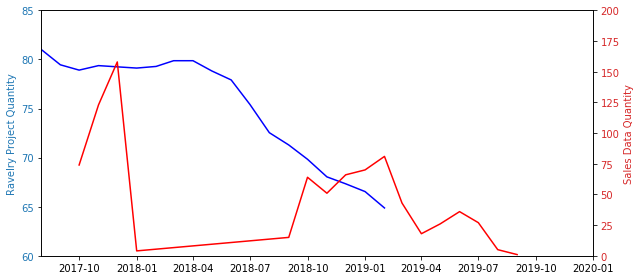

In [74]:
import matplotlib.pyplot as plt
madtoshmlight = pd.read_csv('madtoshmlight.csv')  # doctest: +SKIP
#cascade128superwash_time=pd.read_csv('cascade128superwash.csv')
yarn_name = 'cascade-yarns-128-superwash'
#yarn_name = 'malabrigo-yarn-mechita'
m = slope[yarn_name].coef_
b = slope[yarn_name].intercept_
perc = (m*12)/np.mean(y_predicted[yarn_name])

resultplot = decomp[yarn_name].trend
#plt.plot(resultplot)

x=resultplot.index.values
y=resultplot.values
# Create some mock data

fig, ax1 = plt.subplots(figsize=(9, 4))
#ax1.plot(resultplot,'r')
plt.plot(x,y,'b')
color = 'tab:blue'
#ax1.set_xlabel('')
ax1.set_ylabel('Ravelry Project Quantity', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim([60,85])
ax1.set_xlim(['2017-08','2020'])
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


ax2.plot(cascade128superwash_time['Date'],cascade128superwash_time['Lineitem quantity'],'r')
# ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
# plt.show()

color = 'tab:red'
ax2.set_ylabel('Sales Data Quantity', color=color)  # we already handled the x-label with ax1
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim([0,200])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
#resultplot.plot(label='yarn1')

#the line fit:
#plt.plot(x_dates[yarn_name],y_predicted[yarn_name])
# plt.plot(cascade128superwash_time['Date'],cascade128superwash_time['Lineitem quantity'],label='yarn2')
# plt.legend(loc=1)

# plt.ylabel('Project Count')
# print(perc)
# print(np.mean(y_predicted[yarn_name]))

In [ ]:
decomp['cascade-yarns-128-superwash'].trend

In [ ]:
yData

In [ ]:
import pmdarima
pmdarima.__version__

In [ ]:
yData['rohrspatz--wollmeise-sockenwolle-80-20-twin']

In [ ]:
dfaa= yData['rohrspatz--wollmeise-sockenwolle-80-20-twin']
#result = seasonal_decompose(dfaa['Project Count'], model='add')
#result.plot()
auto_arima(dfaa['Project Count'],seasonal=True,m=12).summary()
#tt  = auto_arima(dfaa['Project Count'],seasonal=True,m=12)

In [ ]:
tt.order


In [ ]:
zData = yData

In [ ]:
for k,v in zData.items():
    try:
        aa=auto_arima(v,seasonal=True,m=12)
    except:
        aa = auto_arima(v,seasonal=True)
    zData[k] = (v,aa.order,aa.seasonal_order)

In [ ]:
zData['rohrspatz--wollmeise-sockenwolle-80-20-twin'][0]

In [ ]:
from statsmodels.tools.eval_measures import rmse

for g in tqdm(zData):
    predictions={}
    fcast={}
    error={}
    print(f'working on dictionary {g}')
    split = len(zData[g][0])
    try:
        train = zData[g][0].iloc[:(round(3*split/4))]
        test = zData[g][0].iloc[(round(3*split/4)):]
        #print(zData[g][2])
        model = SARIMAX(train['Project Count'],order=zData[g][1],seasonal_order=zData[g][2])
        results = model.fit()
    except:
        train = zData[g][0].iloc[:(round(11*split/12))]
        test = zData[g][0].iloc[(round(11*split/12)):]
        #print(zData[g][2])
        model = SARIMAX(train['Project Count'],order=zData[g][1],seasonal_order=zData[g][2])
        results = model.fit()
    start=len(train)
    end=len(train)+len(test)-1
    predictions[g] = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')
    results = model.fit()
    fcast[g] = results.predict(len(zData[g][0]),len(zData[g][0])+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')
    error[g] = rmse(test['Project Count'], predictions[g])
    title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
    ylabel='parts per million'
    xlabel=''
    %matplotlib inline
    ax = zData[g][0]['Project Count'].plot(legend=True,figsize=(12,6),title=title)
    fcast[g].plot(legend=True)
    predictions[g].plot(legend=True)
    ax.autoscale(axis='x',tight=True)
    ax.set(xlabel=xlabel, ylabel=ylabel);
    print(error)
    
    

In [ ]:
from statsmodels.tools.eval_measures import rmse
test = dict()
test['cascade-yarns-128-superwash'] = zData['cascade-yarns-128-superwash']
for g in tqdm(test):
    print(f'working on dictionary {g}')
    split = len(zData[g][0])
    train = zData[g][0].iloc[:(round(3*split/4))]
    test = zData[g][0].iloc[(round(3*split/4)):]
    #print(zData[g][2])
    model = SARIMAX(train['Project Count'],order=zData[g][1],seasonal_order=zData[g][2])
    results = model.fit()
    start=len(train)
    end=len(train)+len(test)-1
    predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('Predictions')
    results = model.fit()
    fcast = results.predict(len(zData[g][0]),len(zData[g][0])+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')
    error = rmse(test['Project Count'], predictions)
    title = 'Monthly Global Yarn Usage'
    ylabel='Projects'
    xlabel=''
    %matplotlib inline
    ax = zData[g][0]['Project Count'].plot(legend=True,figsize=(12,6),title=title)
    predictions.plot(legend=True)
    fcast.plot(legend=True)
    ax.autoscale(axis='x',tight=True)
    ax.set(xlabel=xlabel, ylabel=ylabel);
    print(error)
    
    

In [ ]:
test = dict()
test['rohrspatz--wollmeise-sockenwolle-80-20-twin'] = zData['rohrspatz--wollmeise-sockenwolle-80-20-twin']
test['rohrspatz--wollmeise-sockenwolle-80-20-twin']

In [ ]:
for k,v in zData.items():
    try:
        aa=auto_arima(v,seasonal=True,m=12)
    except:
        aa = auto_arima(v,seasonal=True)
    zData[k] = (v,aa.order,aa.seasonal_order)

len(df2)
train = df2.iloc[:40]
test = df2.iloc[40:]

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')
    

In [ ]:
yData

In [ ]:
decomp

In [ ]:
df1.head()

In [ ]:
#df1.reindex.apply(pd.to_datetime)
df2 = df1.reset_index()
df2 = df2.rename(columns={'index':'Date'})
df2['Date'] = df2['Date'].apply(pd.to_datetime)
df2.head()

In [ ]:
df2['Date']

In [ ]:
get static data set cclean
create table that saves arimamodel output for every yarn
pos data 
find top three globally promising yarns that KTLA carries and compare them visually.

In [ ]:
indexNames = df2[ (dfObj['Age'] >= 30) & (dfObj['Country'] == 'India') ].index
dfObj.drop(indexNames , inplace=True)

In [ ]:
# Set "date" to be the index
df2.set_index('Date',inplace=True)
df2.index.freq = '-1MS'

In [ ]:
df2=df2.sort_index()

In [ ]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = df2['Project Count'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
result = seasonal_decompose(df2['Project Count'], model='add')
result.plot();

In [ ]:
auto_arima(df2['Project Count'],seasonal=True,m=12).summary()

In [ ]:
len(df2)

In [ ]:
train = df2.iloc[:40]
test = df2.iloc[40:]

In [ ]:
model = SARIMAX(train['Project Count'],order=(2,0,0),seasonal_order=(1,1,0,12))
results = model.fit()
results.summary()

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

In [ ]:
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Project Count'][i]}")

In [ ]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['Project Count'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Project Count'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) MSE Error: {error:11.10}')

In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Project Count'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

In [ ]:
model = SARIMAX(df2['Project Count'],order=(2,0,0),seasonal_order=(1,1,0,12))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

In [ ]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = df2['Project Count'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);